In [1]:
import pandas as pd

In [26]:
df = pd.read_csv('results/results.tsv', sep='\t')
df

,entity_count,config_json,config_linkml_runtime_version,config_entity_counts,config_working_directory,create_object_event_duration,create_object_event_start,create_object_event_end,json_dump_event_duration,json_dump_event_start,...,plain_yaml_dump_event_end,plain_yaml_load_event_duration,plain_yaml_load_event_start,plain_yaml_load_event_end,plain_json_dump_event_duration,plain_json_dump_event_start,plain_json_dump_event_end,plain_json_load_event_duration,plain_json_load_event_start,plain_json_load_event_end
0,100,"{\""linkml_runtime_version\"": \""1.2.2\"", \""enti...",1.2.2,[100|1000|10000|100000],tmp,0.006359,1.647826e+09,1.647826e+09,0.013762,1.647826e+09,...,1.647826e+09,0.203052,1.647826e+09,1.647826e+09,0.002714,1.647826e+09,1.647826e+09,0.000903,1.647826e+09,1.647826e+09
1,1000,"{\""linkml_runtime_version\"": \""1.2.2\"", \""enti...",1.2.2,[100|1000|10000|100000],tmp,0.043006,1.647826e+09,1.647826e+09,0.100385,1.647826e+09,...,1.647826e+09,2.100289,1.647826e+09,1.647826e+09,0.032016,1.647826e+09,1.647826e+09,0.004335,1.647826e+09,1.647826e+09
2,10000,"{\""linkml_runtime_version\"": \""1.2.2\"", \""enti...",1.2.2,[100|1000|10000|100000],tmp,0.511881,1.647826e+09,1.647826e+09,1.048754,1.647826e+09,...,1.647826e+09,21.915715,1.647826e+09,1.647826e+09,0.298024,1.647826e+09,1.647826e+09,0.036727,1.647826e+09,1.647826e+09
3,100000,"{\""linkml_runtime_version\"": \""1.2.2\"", \""enti...",1.2.2,[100|1000|10000|100000],tmp,4.973987,1.647826e+09,1.647826e+09,10.039482,1.647826e+09,...,1.647827e+09,211.838919,1.647827e+09,1.647827e+09,2.895067,1.647827e+09,1.647827e+09,0.440804,1.647827e+09,1.647827e+09


In [65]:
df['entity_count']

0       100
1      1000
2     10000
3    100000
Name: entity_count, dtype: int64

In [27]:
df.columns

Index(['entity_count', 'config_json', 'config_linkml_runtime_version',
       'config_entity_counts', 'config_working_directory',
       'create_object_event_duration', 'create_object_event_start',
       'create_object_event_end', 'json_dump_event_duration',
       'json_dump_event_start', 'json_dump_event_end',
       'json_load_event_duration', 'json_load_event_start',
       'json_load_event_end', 'yaml_dump_event_duration',
       'yaml_dump_event_start', 'yaml_dump_event_end',
       'yaml_load_event_duration', 'yaml_load_event_start',
       'yaml_load_event_end', 'rdf_dump_event_duration',
       'rdf_dump_event_start', 'rdf_dump_event_end', 'rdf_load_event_duration',
       'rdf_load_event_start', 'rdf_load_event_end', 'to_dict_event_duration',
       'to_dict_event_start', 'to_dict_event_end',
       'plain_yaml_dump_event_duration', 'plain_yaml_dump_event_start',
       'plain_yaml_dump_event_end', 'plain_yaml_load_event_duration',
       'plain_yaml_load_event_start', 'plai

In [28]:
event_types = ['plain_json', 'plain_yaml', 'json', 'yaml', 'rdf']

load_duration_cols = [f'{x}_load_event_duration' for x in event_types]
dump_duration_cols = [f'{x}_dump_event_duration' for x in event_types]
fdf = df[['entity_count'] + load_duration_cols + dump_duration_cols]
fdf

,entity_count,plain_json_load_event_duration,plain_yaml_load_event_duration,json_load_event_duration,yaml_load_event_duration,rdf_load_event_duration,plain_json_dump_event_duration,plain_yaml_dump_event_duration,json_dump_event_duration,yaml_dump_event_duration,rdf_dump_event_duration
0,100,0.000903,0.203052,0.009980,0.206674,0.235785,0.002714,0.084146,0.013762,0.107396,0.964509
1,1000,0.004335,2.100289,0.124702,2.518293,2.779522,0.032016,0.899264,0.100385,1.089753,5.532330
2,10000,0.036727,21.915715,0.993890,24.967974,24.554882,0.298024,10.807371,1.048754,12.868190,28.277866
3,100000,0.440804,211.838919,9.084904,219.988325,262.984380,2.895067,115.004372,10.039482,105.809481,298.892075


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
fdf.iloc[0]

entity_count                      100.000000
plain_json_load_event_duration      0.000903
plain_yaml_load_event_duration      0.203052
json_load_event_duration            0.009980
yaml_load_event_duration            0.206674
rdf_load_event_duration             0.235785
plain_json_dump_event_duration      0.002714
plain_yaml_dump_event_duration      0.084146
json_dump_event_duration            0.013762
yaml_dump_event_duration            0.107396
rdf_dump_event_duration             0.964509
Name: 0, dtype: float64

<AxesSubplot:>

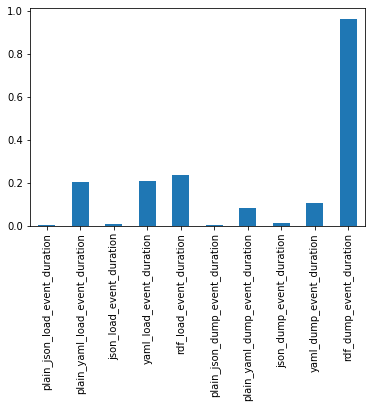

In [31]:
fdf.drop(columns='entity_count').T[0].plot.bar()

In [54]:
fdf = fdf.drop(columns='entity_count')

In [55]:
def mkhist(from_df, row):
    from_df.T[row].plot.bar()

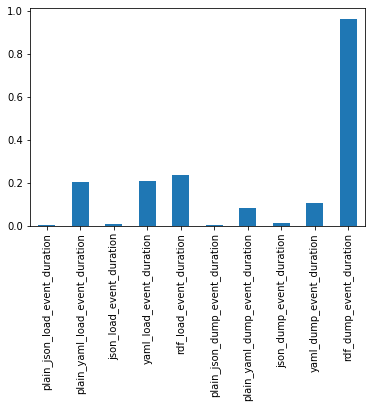

In [56]:
mkhist(fdf, 0)

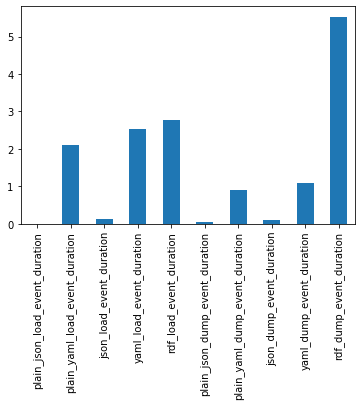

In [57]:
mkhist(fdf, 1)

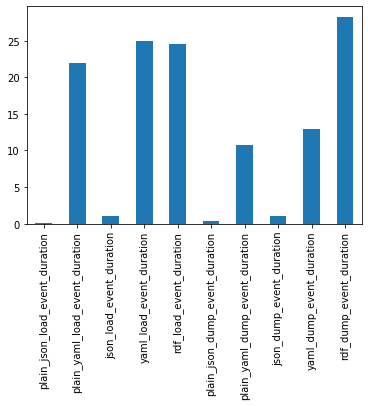

In [58]:
mkhist(fdf, 2)

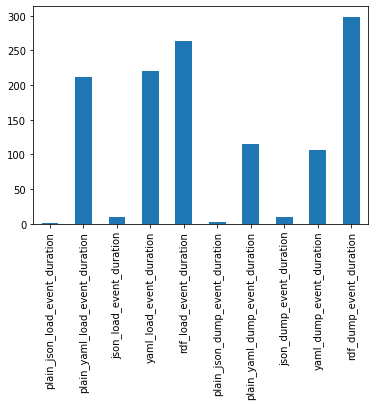

In [59]:
mkhist(fdf, 3)

In [60]:
jsondf = fdf[['plain_json_load_event_duration', 'json_load_event_duration', 'plain_json_dump_event_duration', 'json_dump_event_duration']]
jsondf

,plain_json_load_event_duration,json_load_event_duration,plain_json_dump_event_duration,json_dump_event_duration
0,0.000903,0.009980,0.002714,0.013762
1,0.004335,0.124702,0.032016,0.100385
2,0.036727,0.993890,0.298024,1.048754
3,0.440804,9.084904,2.895067,10.039482


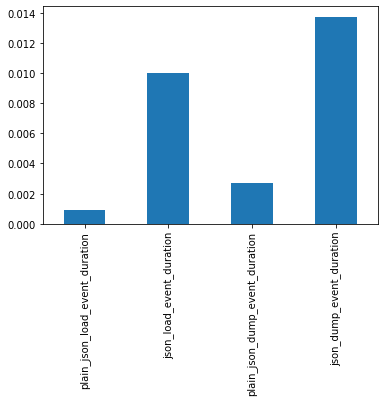

In [61]:
mkhist(jsondf, 0)

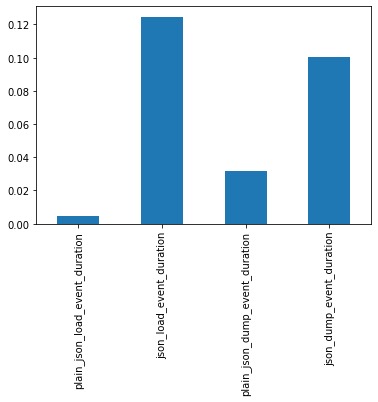

In [62]:
mkhist(jsondf, 1)

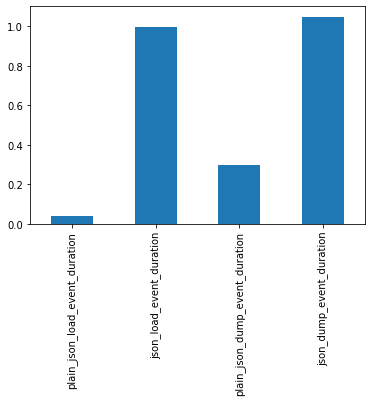

In [63]:
mkhist(jsondf, 2)

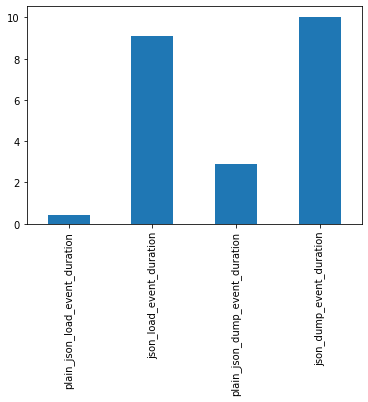

In [64]:
mkhist(jsondf, 3)   ## 100k nodes in graph

In [40]:
s.values

array([9.03129578e-04, 2.03052044e-01, 9.98020172e-03, 2.06673861e-01,
       2.35785246e-01, 2.71415710e-03, 8.41460228e-02, 1.37619972e-02,
       1.07396126e-01, 9.64509010e-01])

<AxesSubplot:>

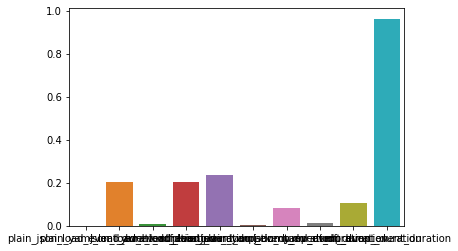

In [45]:
sns.barplot(x=s.index, y=s.values)